# **FULL DATASET BINARY**

## **Preliminary steps**

In [1]:
### PACKAGES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

In [8]:
import os 
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp/analysis
/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp


In [9]:
### FUNCTIONS

from src.configs import constants, ml_config, names
from src.libs import preprocessing, evaluation, visualization
from src.embedding.tf_idf import TfIdfEmbedding
from src.embedding.punctuation import PunctuationEmbedding
from src.classifier.classifier import LightGBMClassifier, RFClassifier, NBClassifier

: 

: 

: 

## **DATA**

In [3]:
### LOAD DATA

df_poetry_gpt = preprocessing.load_dataset(source="GPT", type="POETRY")
df_poetry_bard = preprocessing.load_dataset(source="BARD", type="POETRY")
df_poetry_human = preprocessing.load_dataset(source="Human", type="POETRY")

df_essay_gpt = preprocessing.load_dataset(source="GPT", type="ESSAY")
df_essay_bard = preprocessing.load_dataset(source="BARD", type="ESSAY")
df_essay_human = preprocessing.load_dataset(source="Human", type="ESSAY")

df_story_gpt = preprocessing.load_dataset(source="GPT", type="STORY")
df_story_bard = preprocessing.load_dataset(source="BARD", type="STORY")
df_story_human = preprocessing.load_dataset(source="Human", type="STORY")

Time taken to load dataset: 0.02375316619873047 seconds
Time taken to load dataset: 0.010373353958129883 seconds
Time taken to load dataset: 0.35692429542541504 seconds
Time taken to load dataset: 0.02691960334777832 seconds
Time taken to load dataset: 0.018494606018066406 seconds
Time taken to load dataset: 0.11954855918884277 seconds
Time taken to load dataset: 0.01587200164794922 seconds
Time taken to load dataset: 0.012094736099243164 seconds
Time taken to load dataset: 0.0236208438873291 seconds


In [4]:
### GET TRAIN SPLIT

df_train_poetry_gpt, df_test_poetry_gpt = preprocessing.train_valid_split(df_poetry_gpt)
df_train_poetry_bard, df_test_poetry_bard = preprocessing.train_valid_split(
    df_poetry_bard
)
df_train_poetry_human, df_test_poetry_human = preprocessing.train_valid_split(
    df_poetry_human
)

df_train_essay_gpt, df_test_essay_gpt = preprocessing.train_valid_split(df_essay_gpt)
df_train_essay_bard, df_test_essay_bard = preprocessing.train_valid_split(df_essay_bard)
df_train_essay_human, df_test_essay_human = preprocessing.train_valid_split(
    df_essay_human
)

df_train_story_gpt, df_test_story_gpt = preprocessing.train_valid_split(df_story_gpt)
df_train_story_bard, df_test_story_bard = preprocessing.train_valid_split(df_story_bard)
df_train_story_human, df_test_story_human = preprocessing.train_valid_split(
    df_story_human
)

In [5]:
### GET FULL DATASETS

df_train_poetry = preprocessing.group_llms(
    preprocessing.get_poetry_dataset(
        df_train_poetry_gpt,
        df_train_poetry_bard,
        df_train_poetry_human,
        samples_per_source=min(
            len(df_train_poetry_gpt),
            len(df_train_poetry_bard),
            len(df_train_poetry_human),
        ),
    )
)
df_test_poetry = preprocessing.group_llms(
    preprocessing.get_poetry_dataset(
        df_test_poetry_gpt,
        df_test_poetry_bard,
        df_test_poetry_human,
        samples_per_source=None,
    )
)

df_train_essay = preprocessing.group_llms(
    preprocessing.get_essay_dataset(
        df_train_essay_gpt,
        df_train_essay_bard,
        df_train_essay_human,
        samples_per_source=min(
            len(df_train_essay_gpt), len(df_train_essay_bard), len(df_train_essay_human)
        ),
    )
)
df_test_essay = preprocessing.group_llms(
    preprocessing.get_essay_dataset(
        df_test_essay_gpt,
        df_test_essay_bard,
        df_test_essay_human,
        samples_per_source=None,
    )
)

df_train_story = preprocessing.group_llms(
    preprocessing.get_story_dataset(
        df_train_story_gpt,
        df_train_story_bard,
        df_train_story_human,
        samples_per_source=min(
            len(df_train_story_gpt), len(df_train_story_bard), len(df_train_story_human)
        ),
    )
)
df_test_story = preprocessing.group_llms(
    preprocessing.get_story_dataset(
        df_test_story_gpt,
        df_test_story_bard,
        df_test_story_human,
        samples_per_source=None,
    )
)

In [6]:
### CONCATENATE ALL DATASETS

df_train = pd.concat([df_train_poetry, df_train_essay, df_train_story], axis=0).sample(
    frac=1
)
df_test = pd.concat([df_test_poetry, df_test_essay, df_test_story], axis=0).sample(
    frac=1
)


In [7]:
### SPLIT FEATURES AND LABELS

X_train, y_train = preprocessing.split_features_and_labels(df_train)
X_test, y_test = preprocessing.split_features_and_labels(df_test)
X_test_poetry, y_test_poetry = preprocessing.split_features_and_labels(df_test_poetry)
X_test_essay, y_test_essay = preprocessing.split_features_and_labels(df_test_essay)
X_test_story, y_test_story = preprocessing.split_features_and_labels(df_test_story)

## **CLASSIFICATION USING PUNCTUATION & RANDOM FOREST**

In [8]:
ID_EXPERIMENT = 211

In [9]:
### EMBEDDING

embedding_211 = PunctuationEmbedding(ID_EXPERIMENT)

X_train_211 = embedding_211.transform(X=X_train)
X_test_211 = embedding_211.transform(X=X_test)
X_test_poetry_211 = embedding_211.transform(X=X_test_poetry)
X_test_essay_211 = embedding_211.transform(X=X_test_essay)
X_test_story_211 = embedding_211.transform(X=X_test_story)

In [10]:
### CLASSIFIER

classifier_211 = LightGBMClassifier(ID_EXPERIMENT)

classifier_211.train(X_train=X_train_211, y_train=y_train)

metrics_211 = classifier_211.evaluate(X_test_211, y_test)
metrics_poetry_211 = classifier_211.evaluate(X_test_poetry_211, y_test_poetry)
metrics_essay_211 = classifier_211.evaluate(X_test_essay_211, y_test_essay)
metrics_story_211 = classifier_211.evaluate(X_test_story_211, y_test_story)

print(f"Metrics on test set: {metrics_211}")
print(f"Metrics on poetry: {metrics_poetry_211}")
print(f"Metrics on essay: {metrics_essay_211}")
print(f"Metrics on story: {metrics_story_211}")

Metrics on test set: {'accuracy': 0.5905420991926182, 'precision': 0.5483082706766917, 'recall': 0.7333938764919563, 'f1': 0.4586063447111283}
Metrics on poetry: {'accuracy': 0.5830965909090909, 'precision': 0.5202128686338089, 'recall': 0.7380986937590711, 'f1': 0.40717915613176253}
Metrics on essay: {'accuracy': 0.5756457564575646, 'precision': 0.5741285403050109, 'recall': 0.7295883940620782, 'f1': 0.4882342315713418}
Metrics on story: {'accuracy': 0.8545454545454545, 'precision': 0.813467492260062, 'recall': 0.8375, 'f1': 0.8237179487179487}


In [11]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_211 = embedding_211.map_dimensions_to_names()
feature_importances_211 = classifier_211.get_feature_importance()
most_important_features_211 = np.argsort(feature_importances_211)[-10:][::-1]
for i in most_important_features_211:
    print(f"{dim_names_211[i]}: {feature_importances_211[i]}")

ratio_words_per_sentence: 946
ratio_punctuations: 884
ratio_odd_characters: 819


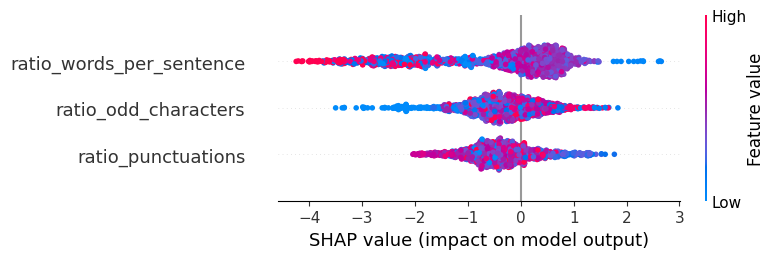

In [12]:
### INTERPRETABILITY - SHAP VALUES

explainer_211 = shap.Explainer(classifier_211.classifier)

if hasattr(X_test_211, "toarray"):
    X_test_211 = X_test_211.toarray()

# Calculate SHAP values
shap_values_211 = explainer_211(X_test_211)

# Visualize the SHAP values
shap.summary_plot(shap_values_211, X_test_211, feature_names=dim_names_211)

## **CLASSIFICATION USING TF-IDF & LGBM**

In [13]:
ID_EXPERIMENT = 111

In [14]:
### EMBEDDING

embedding_111 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_111.fit(X=X_train)

X_train_111 = embedding_111.transform(X=X_train)
X_test_111 = embedding_111.transform(X=X_test)
X_test_poetry_111 = embedding_111.transform(X=X_test_poetry)
X_test_essay_111 = embedding_111.transform(X=X_test_essay)
X_test_story_111 = embedding_111.transform(X=X_test_story)

In [15]:
### CLASSIFIER

classifier_111 = LightGBMClassifier(ID_EXPERIMENT)

classifier_111.train(X_train=X_train_111, y_train=y_train)

metrics_111 = classifier_111.evaluate(X_test_111, y_test)
metrics_poetry_111 = classifier_111.evaluate(X_test_poetry_111, y_test_poetry)
metrics_essay_111 = classifier_111.evaluate(X_test_essay_111, y_test_essay)
metrics_story_111 = classifier_111.evaluate(X_test_story_111, y_test_story)

print(f"Metrics on test set: {metrics_111}")
print(f"Metrics on poetry: {metrics_poetry_111}")
print(f"Metrics on essay: {metrics_essay_111}")
print(f"Metrics on story: {metrics_story_111}")

Metrics on test set: {'accuracy': 0.7848904267589388, 'precision': 0.5932942496290667, 'recall': 0.85118059159315, 'f1': 0.5952013628850403}
Metrics on poetry: {'accuracy': 0.75, 'precision': 0.5392670157068062, 'recall': 0.8722786647314948, 'f1': 0.499604219504709}
Metrics on essay: {'accuracy': 0.9520295202952029, 'precision': 0.8291316526610644, 'recall': 0.9360661268556005, 'f1': 0.8725628504250316}
Metrics on story: {'accuracy': 0.8545454545454545, 'precision': 0.813467492260062, 'recall': 0.8375, 'f1': 0.8237179487179487}


In [16]:
### INTERPRETABILITY - FEATURE IMPORTANCE

dim_names_111 = embedding_111.map_dimensions_to_names()
feature_importances_111 = classifier_111.get_feature_importance()
most_important_features_111 = np.argsort(feature_importances_111)[-10:][::-1]
for i in most_important_features_111:
    print(f"{dim_names_111[i]}: {feature_importances_111[i]}")

like: 232
really: 111
help: 100
world: 85
time: 62
think: 58
just: 57
heart: 52
man: 46
did: 44


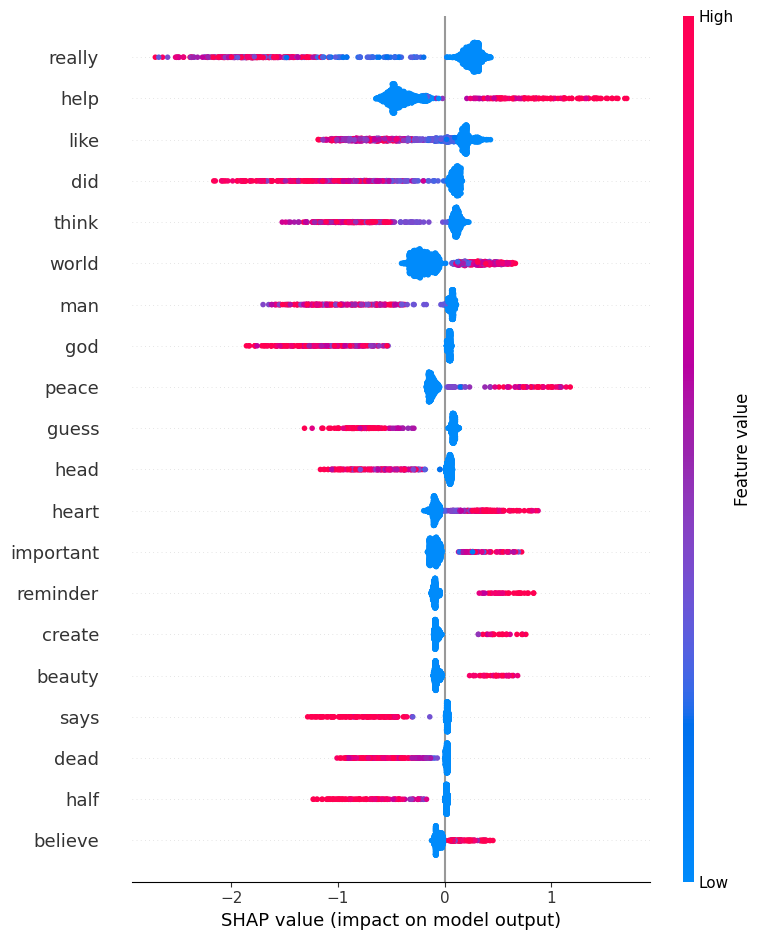

In [17]:
### INTERPRETABILITY - SHAP VALUES

explainer_111 = shap.Explainer(classifier_111.classifier)

if hasattr(X_test_111, "toarray"):
    X_test_111 = X_test_111.toarray()

# Calculate SHAP values
shap_values_111 = explainer_111(X_test_111)


# Visualize the SHAP values
shap.summary_plot(shap_values_111, X_test_111, feature_names=dim_names_111)

## **CLASSIFICATION USING TF-IDF & RANDOM FOREST**

In [18]:
ID_EXPERIMENT = 121

In [19]:
### EMBEDDING

embedding_121 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_121.fit(X=X_train)

X_train_121 = embedding_121.transform(X=X_train)
X_test_121 = embedding_121.transform(X=X_test)
X_test_poetry_121 = embedding_121.transform(X=X_test_poetry)
X_test_essay_121 = embedding_121.transform(X=X_test_essay)
X_test_story_121 = embedding_121.transform(X=X_test_story)

In [20]:
### CLASSIFIER

classifier_121 = RFClassifier(ID_EXPERIMENT)

classifier_121.train(X_train=X_train_121, y_train=y_train)

metrics_121 = classifier_121.evaluate(X_test_121, y_test)
metrics_poetry_121 = classifier_121.evaluate(X_test_poetry_121, y_test_poetry)
metrics_essay_121 = classifier_121.evaluate(X_test_essay_121, y_test_essay)
metrics_story_121 = classifier_121.evaluate(X_test_story_121, y_test_story)

print(f"Metrics on test: {metrics_121}")
print(f"Metrics on poetry: {metrics_poetry_121}")
print(f"Metrics on essay: {metrics_essay_121}")
print(f"Metrics on story: {metrics_story_121}")

Metrics on test: {'accuracy': 0.35409457900807384, 'precision': 0.5335255540479421, 'recall': 0.6384795018162948, 'f1': 0.310928186204939}
Metrics on poetry: {'accuracy': 0.21519886363636365, 'precision': 0.513215859030837, 'recall': 0.5990566037735849, 'f1': 0.1911054036700348}
Metrics on essay: {'accuracy': 0.977859778597786, 'precision': 0.9, 'recall': 0.9878542510121457, 'f1': 0.9382969034608379}
Metrics on story: {'accuracy': 0.8363636363636363, 'precision': 0.7961672473867596, 'recall': 0.7833333333333333, 'f1': 0.789272030651341}


## **CLASSIFICATION USING TF-IDF & NAIVE BAYES**

In [21]:
ID_EXPERIMENT = 131

In [22]:
### EMBEDDING

embedding_131 = TfIdfEmbedding(ID_EXPERIMENT)

embedding_131.fit(X=X_train)

X_train_131 = embedding_131.transform(X=X_train)
X_test_131 = embedding_131.transform(X=X_test)
X_test_poetry_131 = embedding_131.transform(X=X_test_poetry)
X_test_essay_131 = embedding_131.transform(X=X_test_essay)
X_test_story_131 = embedding_131.transform(X=X_test_story)

In [23]:
### CLASSIFIER

classifier_131 = NBClassifier(ID_EXPERIMENT)

classifier_131.train(X_train=X_train_131, y_train=y_train)

metrics_131 = classifier_131.evaluate(X_test_131, y_test)
metrics_poetry_131 = classifier_131.evaluate(X_test_poetry_131, y_test_poetry)
metrics_essay_131 = classifier_131.evaluate(X_test_essay_131, y_test_essay)
metrics_story_131 = classifier_131.evaluate(X_test_story_131, y_test_story)

print(f"Metrics on test: {metrics_131}")
print(f"Metrics on poetry: {metrics_poetry_131}")
print(f"Metrics on essay: {metrics_essay_131}")
print(f"Metrics on story: {metrics_story_131}")

Metrics on test: {'accuracy': 0.47750865051903113, 'precision': 0.5383658536585365, 'recall': 0.6836663207057603, 'f1': 0.3902376165376763}
Metrics on poetry: {'accuracy': 0.37073863636363635, 'precision': 0.5163755458515283, 'recall': 0.6785195936139332, 'f1': 0.29481407785101355}
Metrics on essay: {'accuracy': 0.9704797047970479, 'precision': 0.875, 'recall': 0.9838056680161944, 'f1': 0.9203409758965314}
Metrics on story: {'accuracy': 0.7818181818181819, 'precision': 0.7339181286549707, 'recall': 0.7666666666666666, 'f1': 0.7445820433436532}
